# Download Dataset From Kaggle

*Selected Dataset: flight-delay-and-cancellation-dataset-2019-2023*

In [ ]:
# !pip install kaggle

In [ ]:
# # uploading kaggle tokken for downloading datasets
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#     print('Uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


In [ ]:
# # Then move kaggle.json into the folder where the API expects to find it.
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# # install required packages
# %pip install kaggle numpy pandas matplotlib seaborn scikit-learn

In [ ]:
# # download dataset
# !kaggle datasets download -d patrickzel/flight-delay-and-cancellation-dataset-2019-2023

In [ ]:
# # data extraction
# !unzip ./flight-delay-and-cancellation-dataset-2019-2023.zip

# Data Preprocessing Additional:
Apply other preprocessing techniques such as

1. Handling missing values
2. Normalize and data scaling
3. Handling categorical value

In [ ]:
# import required packages and set display options
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# create a dataframe from our dataset and display the first 5 rows
df = pd.read_csv("./dataset/flights_sample_3m.csv")
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checking data for preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [ ]:
# Checking for missing values
nan_counts = df.isna().sum()
print(nan_counts)

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [ ]:
# Remove the rows with cancelled flights, as we are only interested in predicting delays
# Also we will keep checking df.shape to track changes in the dataframe
print(df.shape)
df = df[df['CANCELLED'] == 0]
# print df shape
print(df.shape)

(3000000, 32)
(2920860, 32)


In [ ]:
#Remove cancelled and cancelled code columns
df = df.drop(columns=['CANCELLED', 'CANCELLATION_CODE'])
print(df.shape)

(2920860, 30)


In [ ]:
# make missing arrival delay as 0
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)
# print missing values
print(df['ARR_DELAY'].isna().sum())

0


In [ ]:
# Now if ARR_DELAY is 0, then replace missing values in ARR_TIME with CRS_ARR_TIME
df.loc[df['ARR_DELAY'] == 0, 'ARR_TIME'] = df['CRS_ARR_TIME']
print(df['ARR_TIME'].isna().sum())

0


In [ ]:
# replace missing TAXI_IN values with average TAXI_IN where ARR_DELAY is 0
mean_taxi_in = df['TAXI_IN'].fillna(df['TAXI_IN'].mean())
df.loc[df['ARR_DELAY'] == 0, 'TAXI_IN'] = mean_taxi_in
print(df['TAXI_IN'].isna().sum())

0


In [ ]:
# (Wheels On = Arr Time - Taxi In)  handle missing values in WHEELS_ON using ARR_TIME and TAXI_IN
wheels_on_time = df['ARR_TIME'] - df['TAXI_IN']
df.loc[df['WHEELS_ON'].isna(), 'WHEELS_ON'] = wheels_on_time
print(df["WHEELS_ON"].isna().sum())

0


In [ ]:
#(Air Time = Wheels On Time - Wheels Off Time) handle missing values in AIR_TIME using WHEELS_ON and WHEELS_OFF
air_time = df['WHEELS_ON'] - df['WHEELS_OFF']
df.loc[df['AIR_TIME'].isna(), 'AIR_TIME'] = air_time
print(df["AIR_TIME"].isna().sum())

0


In [ ]:
#(Elapsed Time = Taxi-Out Time + Air Time + Taxi-In Time) handle missing values in ELAPSED_TIME using TAXI_OUT, AIR_TIME and TAXI_IN
elapsed_time = df['TAXI_OUT'] + df['AIR_TIME'] + df['TAXI_IN']
df.loc[df['ELAPSED_TIME'].isna(), 'ELAPSED_TIME'] = elapsed_time
print(df["ELAPSED_TIME"].isna().sum())

0


In [ ]:
# now replace missing values in DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT with 0
df['DELAY_DUE_CARRIER'] = df['DELAY_DUE_CARRIER'].fillna(0)
df['DELAY_DUE_WEATHER'] = df['DELAY_DUE_WEATHER'].fillna(0)
df['DELAY_DUE_NAS'] = df['DELAY_DUE_NAS'].fillna(0)
df['DELAY_DUE_SECURITY'] = df['DELAY_DUE_SECURITY'].fillna(0)
df['DELAY_DUE_LATE_AIRCRAFT'] = df['DELAY_DUE_LATE_AIRCRAFT'].fillna(0)

# All missing values are handled
print(df.isna().sum())


FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64


In [ ]:
# create a new column 'TOTAL_DELAY', which contains only positive delays from the ARR_DELAY column
# Negative delays are considered as early arrivals and are not considered as delays

df['TOTAL_DELAY'] = df['ARR_DELAY'].apply(lambda x: 0 if x < 0 else x)
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,TOTAL_DELAY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,24.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# normalize all time columns using min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME', 'AIR_TIME', 'ELAPSED_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'TOTAL_DELAY', 'CRS_ELAPSED_TIME',
                'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

df[time_columns] = scaler.fit_transform(df[time_columns])

#now we will normalize distance using min-max normalization
scaler = MinMaxScaler()
df['DISTANCE'] = scaler.fit_transform(df[['DISTANCE']])

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,TOTAL_DELAY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",0.489398,0.479366,0.028141,0.098361,0.503960,0.601529,0.012097,0.625261,0.602751,0.027063,0.0,0.262784,0.535074,0.535284,0.179146,0.0,0.0,0.000000,0.0,0.0,0.00000
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",0.898643,0.880784,0.027487,0.043716,0.884535,0.930049,0.149194,0.964569,0.962484,0.030033,0.0,0.332386,0.548025,0.543060,0.236901,0.0,0.0,0.000000,0.0,0.0,0.00000
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",0.404156,0.416424,0.031414,0.103825,0.424760,0.519919,0.016129,0.521467,0.521467,0.031683,0.0,0.166193,0.521261,0.521027,0.112571,0.0,0.0,0.000000,0.0,0.0,0.00000
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",0.681934,0.669862,0.029123,0.142077,0.681117,0.768495,0.032258,0.761984,0.771988,0.039604,0.0,0.367898,0.558601,0.556021,0.269756,0.0,0.0,0.013785,0.0,0.0,0.00818
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",0.779898,0.765736,0.028796,0.076503,0.771988,0.844276,0.052419,0.850354,0.849937,0.031353,0.0,0.255682,0.536370,0.535284,0.165312,0.0,0.0,0.000000,0.0,0.0,0.00000


In [ ]:
# backup_copy = df.copy() # create a backup copy of the dataframe just in case

# Now we will convert categorical columns to numerical using label encoding and also save the mapping for future use
# Additionally, we need to take low ram usage into account and hence use chunks for label encoding
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
categorical_columns = ['AIRLINE_DOT','ORIGIN_CITY','DEST_CITY']

num_chunks = 10
mapping = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    for i in range(num_chunks):
        chunk = df[column].iloc[i::num_chunks]
        label_encoders[column].fit(chunk)
        df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
        mapping[column]= dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)))
        print(mapping)

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

/tmp/ipykernel_5323/1975205896.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
/tmp/ipykernel_5323/1975205896.py:19: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
print(df.shape)
df.head()

(2920860, 31)


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,TOTAL_DELAY
0,2019-01-09,United Air Lines Inc.,17,UA,19977,1562,FLL,117,EWR,239,0.489398,0.479366,0.028141,0.098361,0.503960,0.601529,0.012097,0.625261,0.602751,0.027063,0.0,0.262784,0.535074,0.535284,0.179146,0.0,0.0,0.000000,0.0,0.0,0.00000
1,2022-11-19,Delta Air Lines Inc.,3,DL,19790,1149,MSP,220,SEA,318,0.898643,0.880784,0.027487,0.043716,0.884535,0.930049,0.149194,0.964569,0.962484,0.030033,0.0,0.332386,0.548025,0.543060,0.236901,0.0,0.0,0.000000,0.0,0.0,0.00000
2,2022-07-22,United Air Lines Inc.,17,UA,19977,459,DEN,88,MSP,220,0.404156,0.416424,0.031414,0.103825,0.424760,0.519919,0.016129,0.521467,0.521467,0.031683,0.0,0.166193,0.521261,0.521027,0.112571,0.0,0.0,0.000000,0.0,0.0,0.00000
3,2023-03-06,Delta Air Lines Inc.,3,DL,19790,2295,MSP,220,SFO,303,0.681934,0.669862,0.029123,0.142077,0.681117,0.768495,0.032258,0.761984,0.771988,0.039604,0.0,0.367898,0.558601,0.556021,0.269756,0.0,0.0,0.013785,0.0,0.0,0.00818
4,2020-02-23,Spirit Air Lines,16,NK,20416,407,MCO,253,DFW,83,0.779898,0.765736,0.028796,0.076503,0.771988,0.844276,0.052419,0.850354,0.849937,0.031353,0.0,0.255682,0.536370,0.535284,0.165312,0.0,0.0,0.000000,0.0,0.0,0.00000


In [ ]:
#print mappings
for key, value in mapping.items():
    print(f"{key} : {value}")

AIRLINE_DOT : {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}
ORIGIN_CITY : {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, NJ':

In [ ]:
# Now drop column with similar information
# AIRLINE_DOT already has AIRLINE and AIRLINE_CODE, so we drop them
# Also ORIGIN AND DEST are covered by ORIGIN_CITY and DEST_CITY
COLS = ['FL_DATE', 'AIRLINE', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN', 'DEST']

df = df.drop(columns=COLS)

# Got the final dataframe with numerical values
print(df.shape)
df.head()

(2920860, 25)


,AIRLINE_DOT,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,TOTAL_DELAY
0,17,1562,117,239,0.489398,0.479366,0.028141,0.098361,0.503960,0.601529,0.012097,0.625261,0.602751,0.027063,0.0,0.262784,0.535074,0.535284,0.179146,0.0,0.0,0.000000,0.0,0.0,0.00000
1,3,1149,220,318,0.898643,0.880784,0.027487,0.043716,0.884535,0.930049,0.149194,0.964569,0.962484,0.030033,0.0,0.332386,0.548025,0.543060,0.236901,0.0,0.0,0.000000,0.0,0.0,0.00000
2,17,459,88,220,0.404156,0.416424,0.031414,0.103825,0.424760,0.519919,0.016129,0.521467,0.521467,0.031683,0.0,0.166193,0.521261,0.521027,0.112571,0.0,0.0,0.000000,0.0,0.0,0.00000
3,3,2295,220,303,0.681934,0.669862,0.029123,0.142077,0.681117,0.768495,0.032258,0.761984,0.771988,0.039604,0.0,0.367898,0.558601,0.556021,0.269756,0.0,0.0,0.013785,0.0,0.0,0.00818
4,16,407,253,83,0.779898,0.765736,0.028796,0.076503,0.771988,0.844276,0.052419,0.850354,0.849937,0.031353,0.0,0.255682,0.536370,0.535284,0.165312,0.0,0.0,0.000000,0.0,0.0,0.00000


In [ ]:
# save df to csv
df.to_csv("./dataframes/preprocessed_data.csv")

In [ ]:
# df_final = df.copy() # create a backup copy of the dataframe just in case

In [ ]:
# df = df_final.copy() # load the backup copy of the dataframe if needed

# Finding Best Features That Can Be Used

## Analyzing Correlation

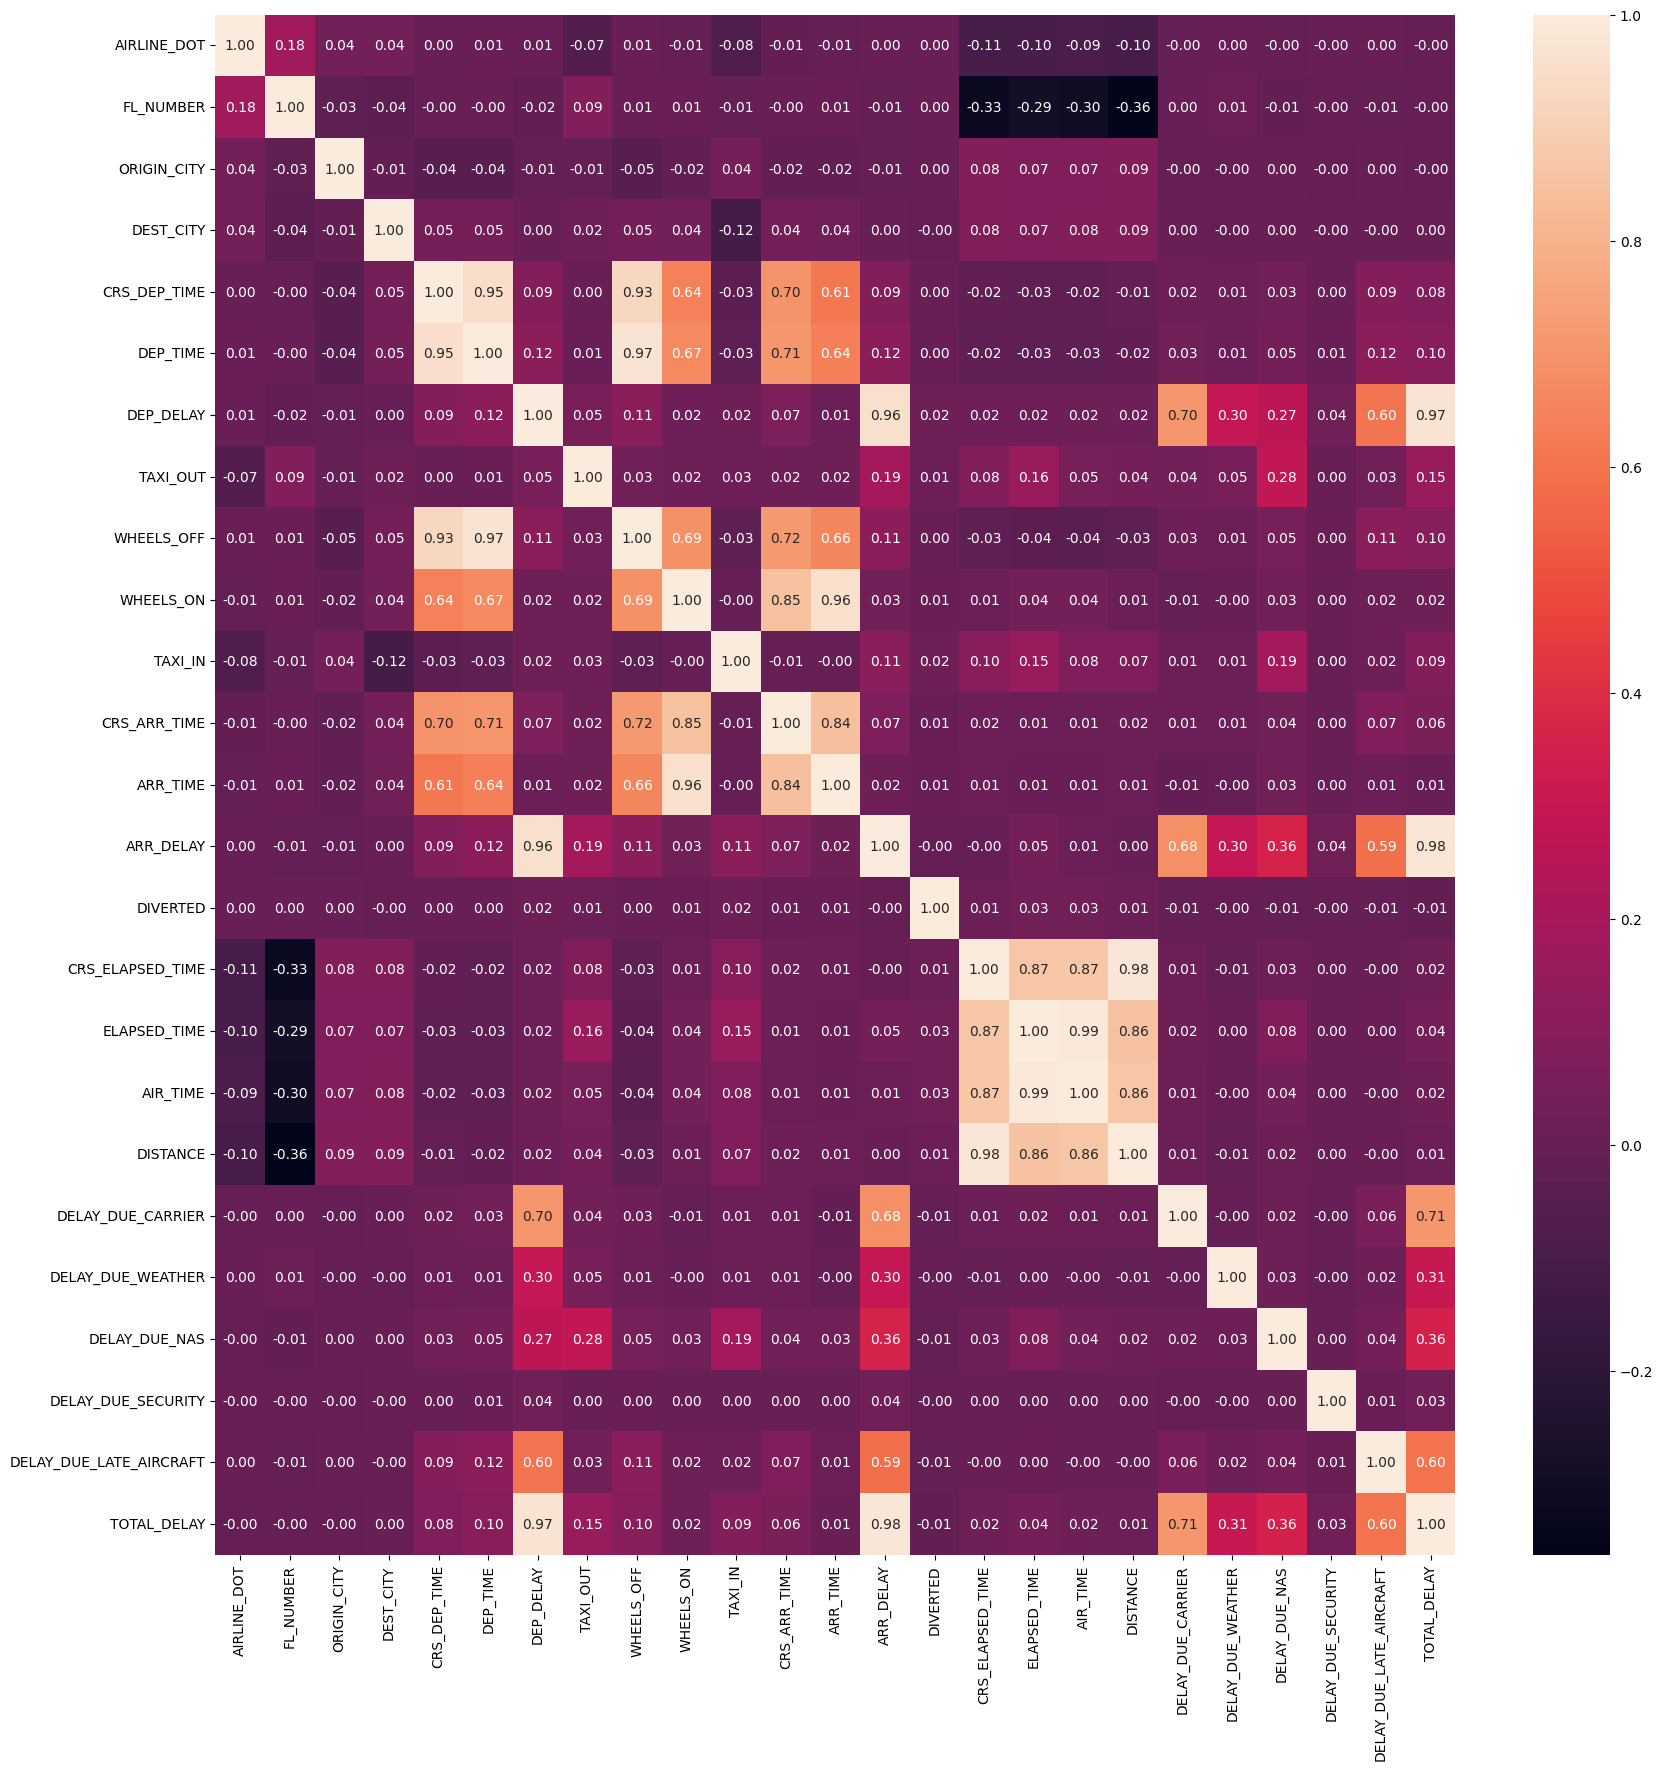

In [ ]:
# Plot a correlation matrix to check for multicollinearity
corr_matrix = df.corr()
corr_matrix

# Import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

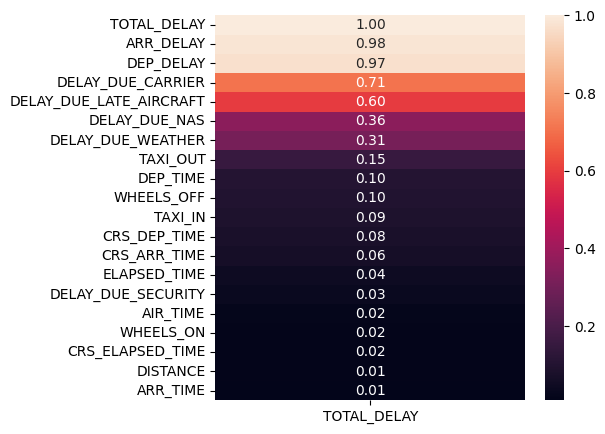

In [ ]:
# Show top 10 correlated features with TOTAL_DELAY
top_20_corr = corr_matrix['TOTAL_DELAY'].sort_values(ascending=False).head(20)

# Remove TOTAL_DELAY from the list
top_20_corr = top_20_corr.drop('TOTAL_DELAY')

# Plot the top 10 correlated features with TOTAL_DELAY using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix['TOTAL_DELAY'].sort_values(ascending=False).head(20).to_frame(), annot=True, fmt=".2f")
plt.show()


In [ ]:
# Create dataframes from 20 most correlated features with TOTAL_DELAY. These will be used for training the model.
df_top_20_corr = df[top_20_corr.index]
df_top_20_corr.head()

,ARR_DELAY,DEP_DELAY,DELAY_DUE_CARRIER,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,WHEELS_OFF,TAXI_IN,CRS_DEP_TIME,CRS_ARR_TIME,ELAPSED_TIME,DELAY_DUE_SECURITY,AIR_TIME,WHEELS_ON,CRS_ELAPSED_TIME,DISTANCE,ARR_TIME
0,0.027063,0.028141,0.0,0.0,0.000000,0.0,0.098361,0.479366,0.503960,0.012097,0.489398,0.625261,0.535074,0.0,0.535284,0.601529,0.262784,0.179146,0.602751
1,0.030033,0.027487,0.0,0.0,0.000000,0.0,0.043716,0.880784,0.884535,0.149194,0.898643,0.964569,0.548025,0.0,0.543060,0.930049,0.332386,0.236901,0.962484
2,0.031683,0.031414,0.0,0.0,0.000000,0.0,0.103825,0.416424,0.424760,0.016129,0.404156,0.521467,0.521261,0.0,0.521027,0.519919,0.166193,0.112571,0.521467
3,0.039604,0.029123,0.0,0.0,0.013785,0.0,0.142077,0.669862,0.681117,0.032258,0.681934,0.761984,0.558601,0.0,0.556021,0.768495,0.367898,0.269756,0.771988
4,0.031353,0.028796,0.0,0.0,0.000000,0.0,0.076503,0.765736,0.771988,0.052419,0.779898,0.850354,0.536370,0.0,0.535284,0.844276,0.255682,0.165312,0.849937


In [ ]:
# We will also use PCA to reduce the dimensionality of the dataset to 10 features
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(df_top_20_corr)
df_pca = pca.transform(df_top_20_corr)
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i}" for i in range(1, 11)])

df_copy = df.copy()
df_copy.reset_index(drop=True, inplace=True)
df_pca['TOTAL_DELAY'] = df_copy['TOTAL_DELAY']

# Check for missing values in the PCA dataframe
print(df_pca.isna().sum())

PC1            0
PC2            0
PC3            0
PC4            0
PC5            0
PC6            0
PC7            0
PC8            0
PC9            0
PC10           0
TOTAL_DELAY    0
dtype: int64


In [ ]:
# We will now drop one of the highly correlated columns from the dataframe for each pair of columns,
#  with a correlation coefficient greater than 0.7

 # Create a list to store columns to drop
drop_cols = []

for i in range (0, len(top_20_corr)):
    for j in range (i+1, len(top_20_corr)):
        if abs(corr_matrix.loc[top_20_corr.index[i], top_20_corr.index[j]]) > 0.7:
            print(f"Correlation between {top_20_corr.index[i]} and {top_20_corr.index[j]} is {corr_matrix.loc[top_20_corr.index[i], top_20_corr.index[j]]}")
            drop_cols.append(top_20_corr.index[j])

# Drop the columns from the dataframe
df_no_multicollinearity = df_top_20_corr.drop(columns=drop_cols)
df_no_multicollinearity.head()


Correlation between ARR_DELAY and DEP_DELAY is 0.9610497449121921
Correlation between DEP_DELAY and DELAY_DUE_CARRIER is 0.7030546167178318
Correlation between DEP_TIME and WHEELS_OFF is 0.9698206734180342
Correlation between DEP_TIME and CRS_DEP_TIME is 0.9547648441331845
Correlation between DEP_TIME and CRS_ARR_TIME is 0.7050363735015638
Correlation between WHEELS_OFF and CRS_DEP_TIME is 0.92679142099127
Correlation between WHEELS_OFF and CRS_ARR_TIME is 0.7156281997538344
Correlation between CRS_DEP_TIME and CRS_ARR_TIME is 0.7016892169750886
Correlation between CRS_ARR_TIME and WHEELS_ON is 0.8501377660085477
Correlation between CRS_ARR_TIME and ARR_TIME is 0.8423662553209205
Correlation between ELAPSED_TIME and AIR_TIME is 0.9903893005653042
Correlation between ELAPSED_TIME and CRS_ELAPSED_TIME is 0.8665688177954308
Correlation between ELAPSED_TIME and DISTANCE is 0.8553341123196351
Correlation between AIR_TIME and CRS_ELAPSED_TIME is 0.8673551204439071
Correlation between AIR_TIM

,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,TAXI_IN,ELAPSED_TIME,DELAY_DUE_SECURITY
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366,0.012097,0.535074,0.0
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784,0.149194,0.548025,0.0
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424,0.016129,0.521261,0.0
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862,0.032258,0.558601,0.0
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736,0.052419,0.536370,0.0


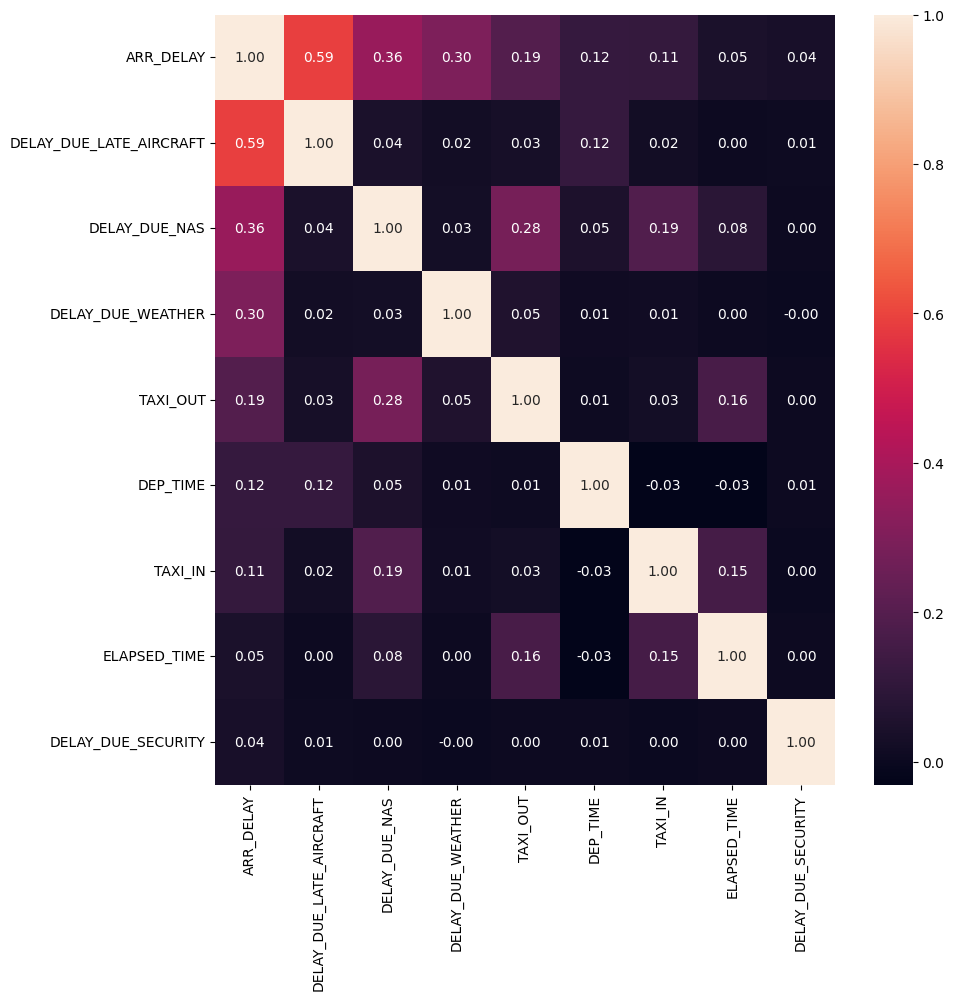

In [ ]:
# Plotting a correlation matrix for the dataframe with no multicollinearity
corr_matrix_no_multicollinearity = df_no_multicollinearity.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_no_multicollinearity, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Add 'TOTAL_DELAY' column to the dataframe, since it is the target variable
df_no_multicollinearity['TOTAL_DELAY'] = df['TOTAL_DELAY']
df_no_multicollinearity.head()

,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,TAXI_IN,ELAPSED_TIME,DELAY_DUE_SECURITY,TOTAL_DELAY
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366,0.012097,0.535074,0.0,0.00000
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784,0.149194,0.548025,0.0,0.00000
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424,0.016129,0.521261,0.0,0.00000
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862,0.032258,0.558601,0.0,0.00818
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736,0.052419,0.536370,0.0,0.00000


## SelectKBest

In [ ]:
# We will now apply various feature selection techniques to select the best features for training the model
# We will use the following feature selection techniques:
# 1. SelectKBest
# 2. SelectPercentile
# 3. VarianceThreshold

# We will create multiple dataframes by applying the above feature selection techniques to the dataframe with no multicollinearity
# We will then train the model on each of these dataframes and compare the results, as well as train a simple Neural Network model on the dataframes

In [ ]:
# First, we will use SelectKBest to select the top 7 features from the dataframe with no multicollinearity
from sklearn.feature_selection import SelectKBest, f_regression

X = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])
y = df_no_multicollinearity['TOTAL_DELAY']

selector = SelectKBest(score_func=f_regression, k=7)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

# Create a new dataframe with the selected features
df_selected_features_7 = df_no_multicollinearity[selected_features]
df_selected_features_7.head()


,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,TAXI_IN
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366,0.012097
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784,0.149194
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424,0.016129
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862,0.032258
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736,0.052419


In [ ]:
# Also, we will use SelectKBest to select the top 5 features from the dataframe with no multicollinearity
from sklearn.feature_selection import SelectKBest, f_regression

X = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])
y = df_no_multicollinearity['TOTAL_DELAY']

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

#  Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

# Dataframe with selected features
df_selected_features_5 = df_no_multicollinearity[selected_features]
df_selected_features_5.head()


,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT
0,0.027063,0.0,0.000000,0.0,0.098361
1,0.030033,0.0,0.000000,0.0,0.043716
2,0.031683,0.0,0.000000,0.0,0.103825
3,0.039604,0.0,0.013785,0.0,0.142077
4,0.031353,0.0,0.000000,0.0,0.076503


## SelectPercentile

In [ ]:
# Now, we will use SelectPercentile to select the top 70% features from the dataframe with no multicollinearity
from sklearn.feature_selection import SelectPercentile

X = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])
y = df_no_multicollinearity['TOTAL_DELAY']

selector = SelectPercentile(score_func=f_regression, percentile=70)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

# Dataframe with selected features
df_selected_features_70 = df_no_multicollinearity[selected_features]
df_selected_features_70.head()

,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736


In [ ]:
# Again, we will use SelectPercentile to select the top 50% features from the dataframe with no multicollinearity
from sklearn.feature_selection import SelectPercentile

X = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])
y = df_no_multicollinearity['TOTAL_DELAY']

selector = SelectPercentile(score_func=f_regression, percentile=50)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

# Dataframe with selected features
df_selected_features_50 = df_no_multicollinearity[selected_features]
df_selected_features_50.head()

,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER
0,0.027063,0.0,0.000000,0.0
1,0.030033,0.0,0.000000,0.0
2,0.031683,0.0,0.000000,0.0
3,0.039604,0.0,0.013785,0.0
4,0.031353,0.0,0.000000,0.0


## VarianceThreshold

#### Selecting only 1 feature , so not feasible to use VarianceThreshold

In [ ]:
# Using Variance Threshold to select features
from sklearn.feature_selection import VarianceThreshold

X = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])
y = df_no_multicollinearity['TOTAL_DELAY']

selector = VarianceThreshold(threshold=0.005)
X_new = selector.fit_transform(X)

# get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

# Dataframe with selected features
df_selected_features_variance = df_no_multicollinearity[selected_features]
df_selected_features_variance.head()

#However, variance threshold selected only 1 feature, which is not enough for training the model.
# Hence, we will not use this dataframe for training the model.


,DEP_TIME
0,0.479366
1,0.880784
2,0.416424
3,0.669862
4,0.765736


In [ ]:
# Add additional columns to the dataframe with no multicollinearity. These columns contain crucial information about the flight.
# We will use these columns to train the model and predict the delay.

df_no_multicollinearity['AIRLINE_DOT'] = df['AIRLINE_DOT']
df_no_multicollinearity['FL_NUMBER'] = df['FL_NUMBER']
df_no_multicollinearity['ORIGIN_CITY'] = df['ORIGIN_CITY']
df_no_multicollinearity['DEST_CITY'] = df['DEST_CITY']

df_no_multicollinearity.head()


,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,TAXI_IN,ELAPSED_TIME,DELAY_DUE_SECURITY,TOTAL_DELAY,AIRLINE_DOT,FL_NUMBER,ORIGIN_CITY,DEST_CITY
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366,0.012097,0.535074,0.0,0.00000,17,1562,117,239
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784,0.149194,0.548025,0.0,0.00000,3,1149,220,318
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424,0.016129,0.521261,0.0,0.00000,17,459,88,220
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862,0.032258,0.558601,0.0,0.00818,3,2295,220,303
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736,0.052419,0.536370,0.0,0.00000,16,407,253,83


In [ ]:
# Add airline dot,fl no, origin city, dest city and total delay to the df_selected_features_7

df_selected_features_7['AIRLINE_DOT'] = df['AIRLINE_DOT']
df_selected_features_7['FL_NUMBER'] = df['FL_NUMBER']
df_selected_features_7['ORIGIN_CITY'] = df['ORIGIN_CITY']
df_selected_features_7['DEST_CITY'] = df['DEST_CITY']
df_selected_features_7['TOTAL_DELAY'] = df['TOTAL_DELAY']

# Add airline dot,fl no, origin city, dest city and total delay to the df_selected_features_5

df_selected_features_5['AIRLINE_DOT'] = df['AIRLINE_DOT']
df_selected_features_5['FL_NUMBER'] = df['FL_NUMBER']
df_selected_features_5['ORIGIN_CITY'] = df['ORIGIN_CITY']
df_selected_features_5['DEST_CITY'] = df['DEST_CITY']
df_selected_features_5['TOTAL_DELAY'] = df['TOTAL_DELAY']

# Add airline dot,fl no, origin city, dest city and total delay to the df_selected_features_70

df_selected_features_70['AIRLINE_DOT'] = df['AIRLINE_DOT']
df_selected_features_70['FL_NUMBER'] = df['FL_NUMBER']
df_selected_features_70['ORIGIN_CITY'] = df['ORIGIN_CITY']
df_selected_features_70['DEST_CITY'] = df['DEST_CITY']
df_selected_features_70['TOTAL_DELAY'] = df['TOTAL_DELAY']

# Add airline dot,fl no, origin city, dest city and total delay to the df_selected_features_50

df_selected_features_50['AIRLINE_DOT'] = df['AIRLINE_DOT']
df_selected_features_50['FL_NUMBER'] = df['FL_NUMBER']
df_selected_features_50['ORIGIN_CITY'] = df['ORIGIN_CITY']
df_selected_features_50['DEST_CITY'] = df['DEST_CITY']
df_selected_features_50['TOTAL_DELAY'] = df['TOTAL_DELAY']


# Add Total Delay column to the PCA dataframe
df_pca['TOTAL_DELAY'] = df_selected_features_50['TOTAL_DELAY']



In [ ]:
# Print the shape of each dataframe
print(df_no_multicollinearity.shape ,end=" | ")
print(df_selected_features_7.shape ,end=" | ")
print(df_selected_features_5.shape ,end=" | ")
print(df_selected_features_70.shape ,end=" | ")
print(df_selected_features_50.shape ,end=" | ")
print(df_pca.shape ,end=" | ")

print()

# Check for missing values in all dataframes
print(df_no_multicollinearity.isna().sum().sum(),end=" | ")
print(df_selected_features_7.isna().sum().sum(),end=" | ")
print(df_selected_features_5.isna().sum().sum(),end=" | ")
print(df_selected_features_70.isna().sum().sum(),end=" | ")
print(df_selected_features_50.isna().sum().sum(),end=" | ")
print(df_pca.isna().sum().sum(),end=" | ")


(2920860, 14) | (2920860, 12) | (2920860, 10) | (2920860, 11) | (2920860, 9) | (2920860, 11) | 
0 | 0 | 0 | 0 | 0 | 77026 | 

In [ ]:
# Delete the original dataframe to free up memory
del df
del top_20_corr

In [ ]:
# Display the number of columns and rows in each dataframe
print(f"{'Number of columns':<30} {'Number of rows':<20}")
print("-" * 50)
for df in [df_pca,df_no_multicollinearity, df_selected_features_7, df_selected_features_5, df_selected_features_70, df_selected_features_50]:
    print(f"{df.shape[1]:<30} {df.shape[0]:<20}")

Column Name                    Number of Columns   
--------------------------------------------------
11                             2920860             
14                             2920860             
12                             2920860             
10                             2920860             
11                             2920860             
9                              2920860             


In [ ]:
# Save the dataframes to csv files
# df_pca.to_csv("./dataframes/df_pca.csv")
df_no_multicollinearity.to_csv("./dataframes/df_no_multicollinearity.csv")
df_selected_features_7.to_csv("./dataframes/df_selected_features_7.csv")
df_selected_features_5.to_csv("./dataframes/df_selected_features_5.csv")
df_selected_features_70.to_csv("./dataframes/df_selected_features_70.csv")
df_selected_features_50.to_csv("./dataframes/df_selected_features_50.csv")

# Delete the dataframes to free up memory
# del df_pca
del df_no_multicollinearity
del df_selected_features_7
del df_selected_features_5
del df_selected_features_70
del df_selected_features_50

# Objective 1: To Predict Delay using Traditional Regression Models and there Comparision on Different selected Fetures  

In [ ]:
# Load the dataframes
import pandas as pd
df_no_multicollinearity = pd.read_csv("./dataframes/df_no_multicollinearity.csv")

# Apply linear,polynomial,ridge,elasticnet and lasso regression on the dataframes and calculate mse and r2 score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def apply_regression(df):
    X = df.drop(columns=['TOTAL_DELAY'])
    y = df['TOTAL_DELAY']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        "Linear Regression": LinearRegression(),
        "Polynomial Regression": PolynomialFeatures(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet Regression": ElasticNet()
    }
    results = {}
    for name, model in models.items():
        if name == "Polynomial Regression":
            X_train_poly = model.fit_transform(X_train)
            X_test_poly = model.transform(X_test)
            model = LinearRegression()
            model.fit(X_train_poly, y_train)
            y_pred = model.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R2": r2}
    return results

/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.84789e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# Apply regression on df_no_multicollinearity and print MSE and R2 scores
results_no_multicollinearity = apply_regression(df_no_multicollinearity)

print(f"{'Model Name':<30} {'MSE':<20} {'R2':<20}")
print("-" * 70)
for name, result in results_no_multicollinearity.items():
    print(f"{name:<30} {result['MSE']:<20} {result['R2']:<20}")


Model Name                     MSE                  R2                  
----------------------------------------------------------------------
Linear Regression              7.988510907627298e-06 0.9699326743979291  
Polynomial Regression          6.535727282534376e-06 0.975400692003478   
Ridge Regression               7.990973108146917e-06 0.9699234071157563  
Lasso Regression               0.0002656882984313324 -3.2133607958950705e-06
ElasticNet Regression          0.00026568830792062117 -3.2490767809534304e-06


In [ ]:
# Load the dataframes
df_selected_features_7 = pd.read_csv("./dataframes/df_selected_features_7.csv")


# Apply regression on df_selected_features_7 and print MSE and R2 scores
results_selected_features_7 = apply_regression(df_selected_features_7)

print(f"{'Model Name':<30} {'MSE':<20} {'R2':<20}")
print("-" * 70)
for name, result in results_selected_features_7.items():
    print(f"{name:<30} {result['MSE']:<20} {result['R2']:<20}")


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.22031e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Name                     MSE                  R2                  
----------------------------------------------------------------------
Linear Regression              8.020725482461745e-06 0.9698114245026883  
Polynomial Regression          8.669621720871369e-06 0.9673690951740029  
Ridge Regression               8.023218614048441e-06 0.9698020408015138  
Lasso Regression               0.0002656882984313324 -3.2133607958950705e-06
ElasticNet Regression          0.00026568830792062117 -3.2490767809534304e-06


In [ ]:
# Load the dataframe df_selected_features_5
df_selected_features_5 = pd.read_csv("./dataframes/df_selected_features_5.csv")


# Apply regression on df_selected_features_5 and print MSE and R2 scores
results_selected_features_5 = apply_regression(df_selected_features_5)


print(f"{'Model Name':<30} {'MSE':<20} {'R2':<20}")
print("-" * 70)
for name, result in results_selected_features_5.items():
    print(f"{name:<30} {result['MSE']:<20} {result['R2']:<20}")


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.24031e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Name                     MSE                  R2                  
----------------------------------------------------------------------
Linear Regression              8.228197117745715e-06 0.9690305383921967  
Polynomial Regression          6.288200094336359e-06 0.9763323400476471  
Ridge Regression               8.23065206597033e-06 0.9690212984063645  
Lasso Regression               0.0002656882984313324 -3.2133607958950705e-06
ElasticNet Regression          0.00026568830792062117 -3.2490767809534304e-06


In [ ]:
# Load the dataframe df_selected_features_70
df_selected_features_50 = pd.read_csv("./dataframes/df_selected_features_50.csv")


# Apply regression on df_selected_features_70 and print MSE and R2 scores
results_selected_features_50 = apply_regression(df_selected_features_50)

print(f"{'Model Name':<30} {'MSE':<20} {'R2':<20}")
print("-" * 70)
for name, result in results_selected_features_50.items():
    print(f"{name:<30} {result['MSE']:<20} {result['R2']:<20}")


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.24736e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Name                     MSE                  R2                  
----------------------------------------------------------------------
Linear Regression              8.64573190734626e-06 0.9674590121572978  
Polynomial Regression          6.963125367904535e-06 0.9737920420882282  
Ridge Regression               8.64822454713895e-06 0.967449630307148   
Lasso Regression               0.0002656882984313324 -3.2133607958950705e-06
ElasticNet Regression          0.00026568830792062117 -3.2490767809534304e-06


In [ ]:
# Load the dataframe df_selected_features_70
df_selected_features_70 = pd.read_csv("./dataframes/df_selected_features_70.csv")


# Apply regression on df_selected_features_70 and print MSE and R2 scores
results_selected_features_70 = apply_regression(df_selected_features_70)

print(f"{'Model Name':<30} {'MSE':<20} {'R2':<20}")
print("-" * 70)
for name, result in results_selected_features_70.items():
    print(f"{name:<30} {result['MSE']:<20} {result['R2']:<20}")


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.23136e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Name                     MSE                  R2                  
----------------------------------------------------------------------
Linear Regression              8.173624859552844e-06 0.9692359386069423  
Polynomial Regression          6.306405811127425e-06 0.976263816987354   
Ridge Regression               8.176066880042131e-06 0.9692267472787928  
Lasso Regression               0.0002656882984313324 -3.2133607958950705e-06
ElasticNet Regression          0.00026568830792062117 -3.2490767809534304e-06


In [ ]:
# Save these results into a single csv file and name them accordingly
results_no_multicollinearity_df = pd.DataFrame(results_no_multicollinearity)
results_no_multicollinearity_df.to_csv("./results/results_no_multicollinearity.csv")

results_selected_features_7_df = pd.DataFrame(results_selected_features_7)
results_selected_features_7_df.to_csv("./results/results_selected_features_7.csv")

results_selected_features_5_df = pd.DataFrame(results_selected_features_5)
results_selected_features_5_df.to_csv("./results/results_selected_features_5.csv")

results_selected_features_50_df = pd.DataFrame(results_selected_features_50)

results_selected_features_50_df.to_csv("./results/results_selected_features_50.csv")

results_selected_features_70_df = pd.DataFrame(results_selected_features_70)
results_selected_features_70_df.to_csv("./results/results_selected_features_70.csv")




In [ ]:
import pandas as pd

# Read all csv files from dataframes
df_no_multicollinearity = pd.read_csv("./dataframes/df_no_multicollinearity.csv")
df_selected_features_7 = pd.read_csv("./dataframes/df_selected_features_7.csv")
df_selected_features_5 = pd.read_csv("./dataframes/df_selected_features_5.csv")
df_selected_features_70 = pd.read_csv("./dataframes/df_selected_features_70.csv")
df_selected_features_50 = pd.read_csv("./dataframes/df_selected_features_50.csv")


# Add a 'CLASSIFICATION' column to each dataframe, which will contain 0 if TOTAL_DELAY is 0, and 1 otherwise
df_no_multicollinearity['CLASSIFICATION'] = df_no_multicollinearity['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)
df_selected_features_7['CLASSIFICATION'] = df_selected_features_7['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)
df_selected_features_5['CLASSIFICATION'] = df_selected_features_5['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)
df_selected_features_70['CLASSIFICATION'] = df_selected_features_70['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)
df_selected_features_50['CLASSIFICATION'] = df_selected_features_50['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)

# Drop the 'TOTAL_DELAY' column from each dataframe
df_no_multicollinearity = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])
df_selected_features_7 = df_selected_features_7.drop(columns=['TOTAL_DELAY'])
df_selected_features_5 = df_selected_features_5.drop(columns=['TOTAL_DELAY'])
df_selected_features_70 = df_selected_features_70.drop(columns=['TOTAL_DELAY'])
df_selected_features_50 = df_selected_features_50.drop(columns=['TOTAL_DELAY'])

# Objective 2: Classification to determine Delay or No delay

### Using Traditional Approaches like KNN and Logistic Regression

In [ ]:
# Apply KNN and Logistic Regression on each dataframe and calculate accuracy, precision, recall, and F1 score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def apply_classification(df):
    X = df.drop(columns=['CLASSIFICATION'])
    y = df['CLASSIFICATION']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        "KNN": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}

    # Plot confusion matrix for each model

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt=".0f")
        plt.title(f"{name} Confusion Matrix")
        plt.show()

    return results


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


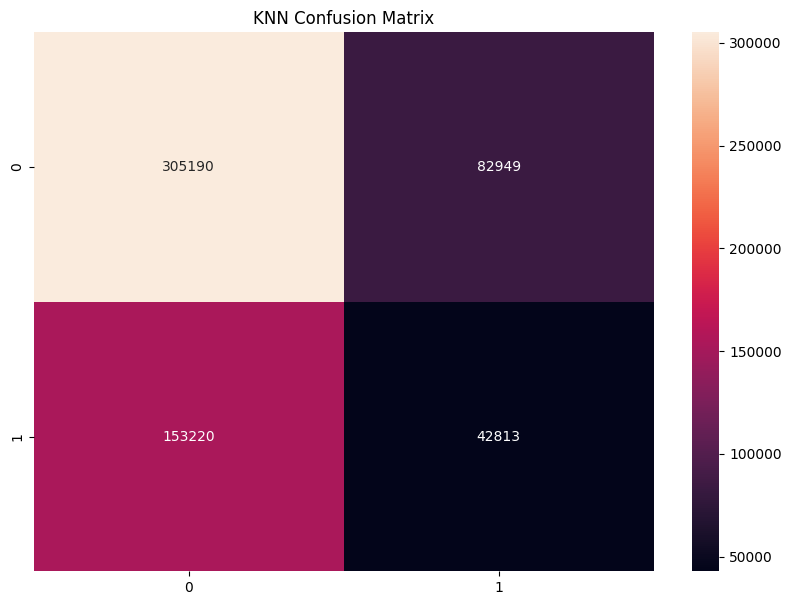

/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


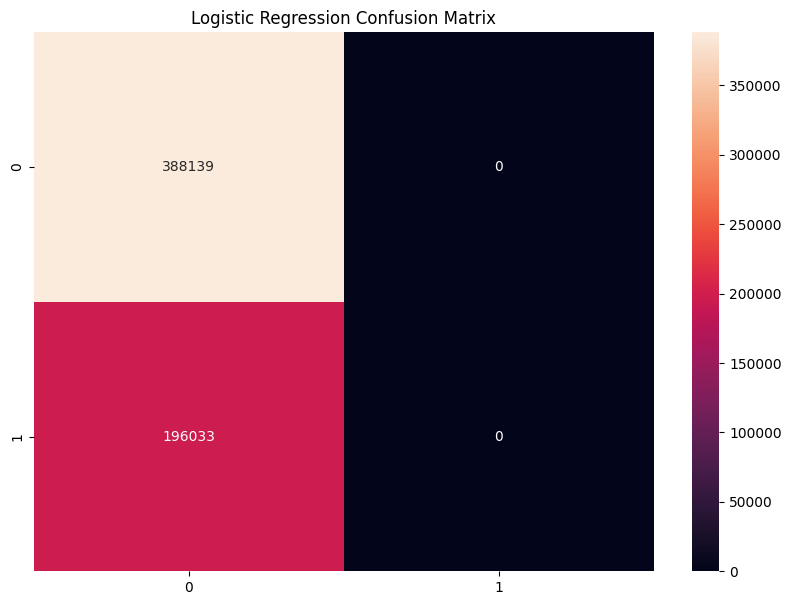

Model Name                     Accuracy             Precision            Recall               F1                  
------------------------------------------------------------------------------------------
KNN                            0.5957200961360695   0.3404287463621762   0.2183969025623237   0.26608865892882116 
Logistic Regression            0.6644258882657847   0.0                  0.0                  0.0                 


In [ ]:
# Apply classification on df_no_multicollinearity
results_no_multicollinearity_classification = apply_classification(df_no_multicollinearity)

# Print the results of classification in a tabular format
print(f"{'Model Name':<30} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1':<20}")
print("-" * 90)

for name, result in results_no_multicollinearity_classification.items():
    print(f"{name:<30} {result['Accuracy']:<20} {result['Precision']:<20} {result['Recall']:<20} {result['F1']:<20}")




/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


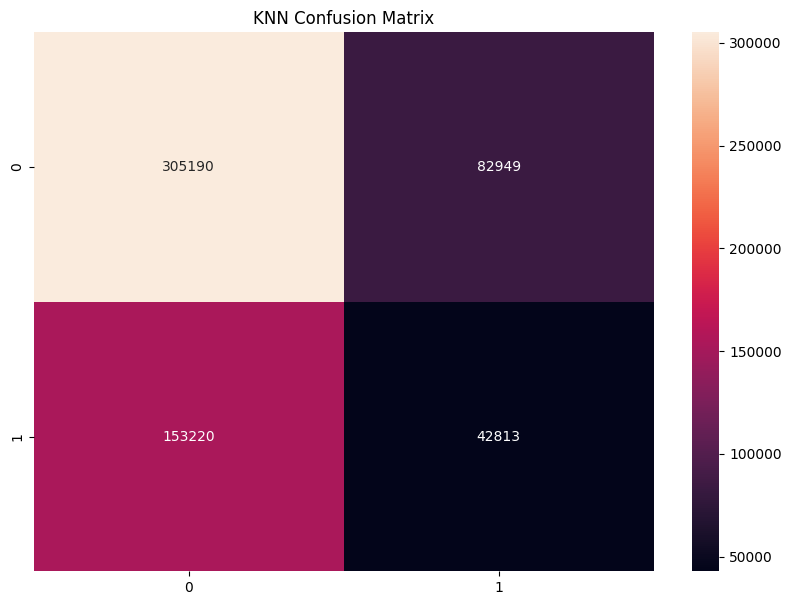

/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


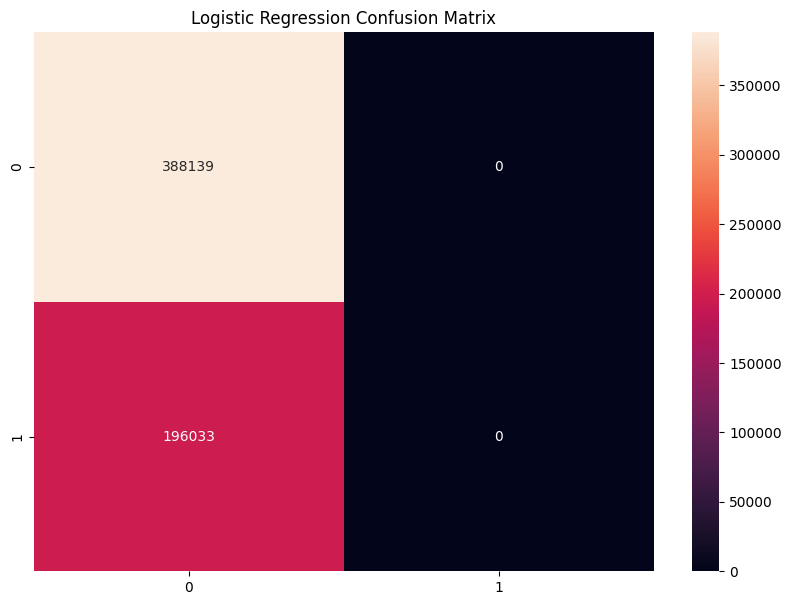

Model Name                     Accuracy             Precision            Recall               F1                  
------------------------------------------------------------------------------------------
KNN                            0.5957200961360695   0.3404287463621762   0.2183969025623237   0.26608865892882116 
Logistic Regression            0.6644258882657847   0.0                  0.0                  0.0                 


In [ ]:
# Apply classification on df_selected_features_7
results_selected_features_7_classification = apply_classification(df_selected_features_7)

# Print the results of classification in a tabular format
print(f"{'Model Name':<30} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1':<20}")
print("-" * 90)

for name, result in results_selected_features_7_classification.items():
    print(f"{name:<30} {result['Accuracy']:<20} {result['Precision']:<20} {result['Recall']:<20} {result['F1']:<20}")


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


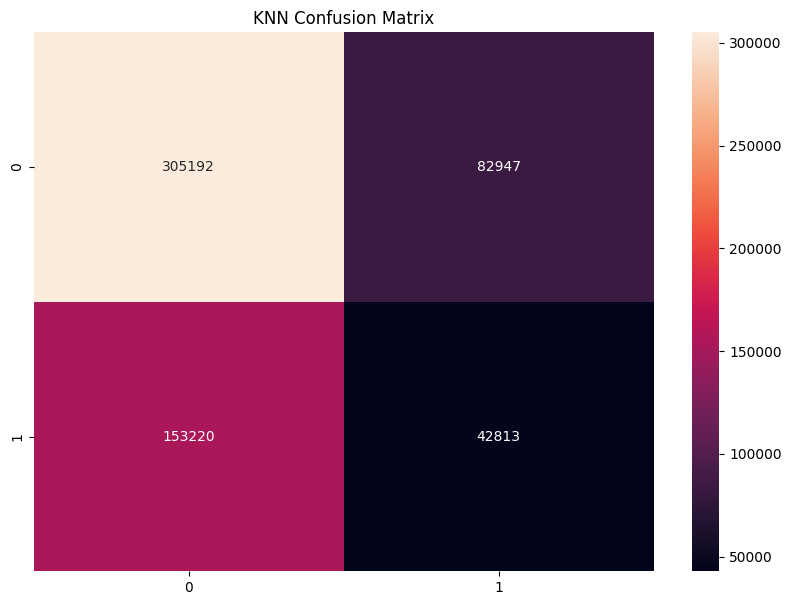

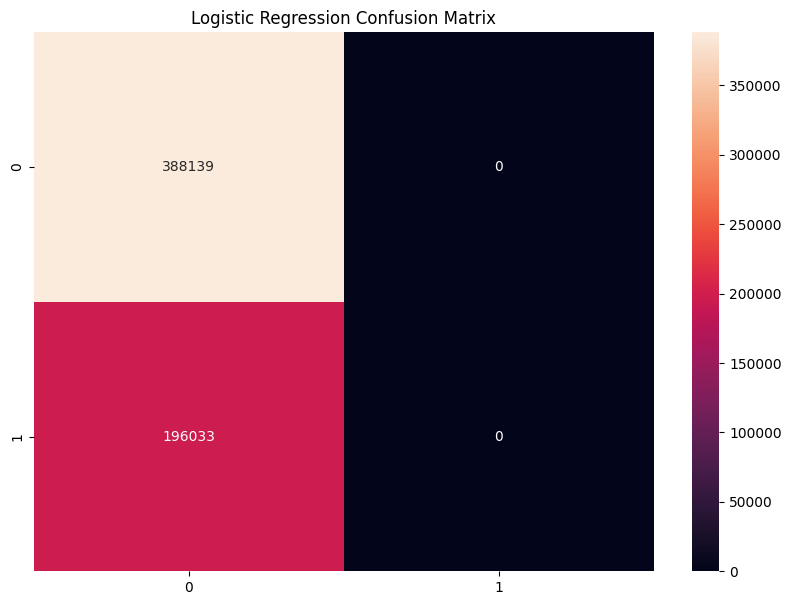

Model Name                     Accuracy             Precision            Recall               F1                  
------------------------------------------------------------------------------------------
KNN                            0.5957235197852687   0.3404341603053435   0.2183969025623237   0.26609031271656003 
Logistic Regression            0.6644258882657847   0.0                  0.0                  0.0                 


In [ ]:
# Apply classification on df_selected_features_5
results_selected_features_5_classification = apply_classification(df_selected_features_5)

# Print the results of classification in a tabular format
print(f"{'Model Name':<30} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1':<20}")
print("-" * 90)

for name, result in results_selected_features_5_classification.items():
    print(f"{name:<30} {result['Accuracy']:<20} {result['Precision']:<20} {result['Recall']:<20} {result['F1']:<20}")


In [ ]:
#  Apply classification on df_selected_features_50
results_selected_features_70_classification = apply_classification(df_selected_features_70)

# Print the results of classification in a tabular format
print(f"{'Model Name':<30} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1':<20}")
print("-" * 90)

for name, result in results_selected_features_70_classification.items():
    print(f"{name:<30} {result['Accuracy']:<20} {result['Precision']:<20} {result['Recall']:<20} {result['F1']:<20}")


/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Name                     Accuracy             Precision            Recall               F1                  
------------------------------------------------------------------------------------------
KNN                            0.5957200961360695   0.3404287463621762   0.2183969025623237   0.26608865892882116 
Logistic Regression            0.6644258882657847   0.0                  0.0                  0.0                 


In [ ]:
#  Apply classification on df_selected_features_50
results_selected_features_50_classification = apply_classification(df_selected_features_50)

# Print the results of classification in a tabular format
print(f"{'Model Name':<30} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1':<20}")
print("-" * 90)

for name, result in results_selected_features_50_classification.items():
    print(f"{name:<30} {result['Accuracy']:<20} {result['Precision']:<20} {result['Recall']:<20} {result['F1']:<20}")

/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/run/media/swapnil/Data/Mini dproject/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Name                     Accuracy             Precision            Recall               F1                  
------------------------------------------------------------------------------------------
KNN                            0.595726943434468    0.34044211195928753  0.21840200374426755  0.26609652789215427 
Logistic Regression            0.6644258882657847   0.0                  0.0                  0.0                 


In [ ]:
# Save the results of classification to csv files and name them accordingly
results_no_multicollinearity_classification_df = pd.DataFrame(results_no_multicollinearity_classification)
results_no_multicollinearity_classification_df.to_csv("./results/results_no_multicollinearity_classification.csv")

results_selected_features_7_classification_df = pd.DataFrame(results_selected_features_7_classification)
results_selected_features_7_classification_df.to_csv("./results/results_selected_features_7_classification.csv")

results_selected_features_5_classification_df = pd.DataFrame(results_selected_features_5_classification)
results_selected_features_5_classification_df.to_csv("./results/results_selected_features_5_classification.csv")

results_selected_features_70_classification_df = pd.DataFrame(results_selected_features_70_classification)
results_selected_features_70_classification_df.to_csv("./results/results_selected_features_70_classification.csv")

results_selected_features_50_classification_df = pd.DataFrame(results_selected_features_50_classification)
results_selected_features_50_classification_df.to_csv("./results/results_selected_features_50_classification.csv")



In [ ]:
# Apply Random Forest and Decision Tree on df_no_multicollinearity and calculate accuracy, precision, recall, and F1 score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# import scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def apply_random_forest_decision_tree(df):
    X = df.drop(columns=['CLASSIFICATION'])
    y = df['CLASSIFICATION']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}
    return results

In [ ]:
# Apply Random Forest and Decision Tree on df_no_multicollinearity
results_no_multicollinearity_random_forest_decision_tree = apply_random_forest_decision_tree(df_no_multicollinearity)

# Print the results of Random Forest and Decision Tree in a tabular format
print(f"{'Model Name':<30} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1':<20}")
print("-" * 90)

for name, result in results_no_multicollinearity_random_forest_decision_tree.items():
    print(f"{name:<30} {result['Accuracy']:<20} {result['Precision']:<20} {result['Recall']:<20} {result['F1']:<20}")

Model Name                     Accuracy             Precision            Recall               F1                  
------------------------------------------------------------------------------------------
Random Forest                  1.0                  1.0                  1.0                  1.0                 
Decision Tree                  1.0                  1.0                  1.0                  1.0                 


### Depp Learning Approch

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read CSV without multicollinearity
df_no_multicollinearity = pd.read_csv("/content/drive/MyDrive/dataframes/dataframes/df_no_multicollinearity.csv")
df_no_multicollinearity = df_no_multicollinearity.drop(df_no_multicollinearity.columns[0], axis=1)

# df_no_multicollinearity = pd.read_csv("/content/drive/MyDrive/dataframes/dataframes/df_no_multicollinearity.csv", usecols=range(1, df_no_multicollinearity.shape[1]))

df_no_multicollinearity['CLASSIFICATION'] = df_no_multicollinearity['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)
df_no_multicollinearity = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])

# Pick 100000 distinct rows from dataset to reduce dataset size and avoid overfitting
df_100000 = df_no_multicollinearity.sample(n=100000, random_state=42)

# Apply deep learning model to predict the delay and calculate accuracy, precision, recall, and F1 score
def apply_deep_learning(df):
    X = df.drop(columns=['CLASSIFICATION'])
    y = df['CLASSIFICATION']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1, batch_size=10, verbose=1, validation_data=(X_test, y_test))
    y_pred = model.predict(X_test)
    y_pred_rounded = np.round(y_pred).flatten()
    return y_test, y_pred_rounded,model,sc

y_test, y_pred_rounded,model, sc = apply_deep_learning(df_100000)

model.summary()

# User Interface For Above Implementation
*Delete runtime. Start running freshly from here*
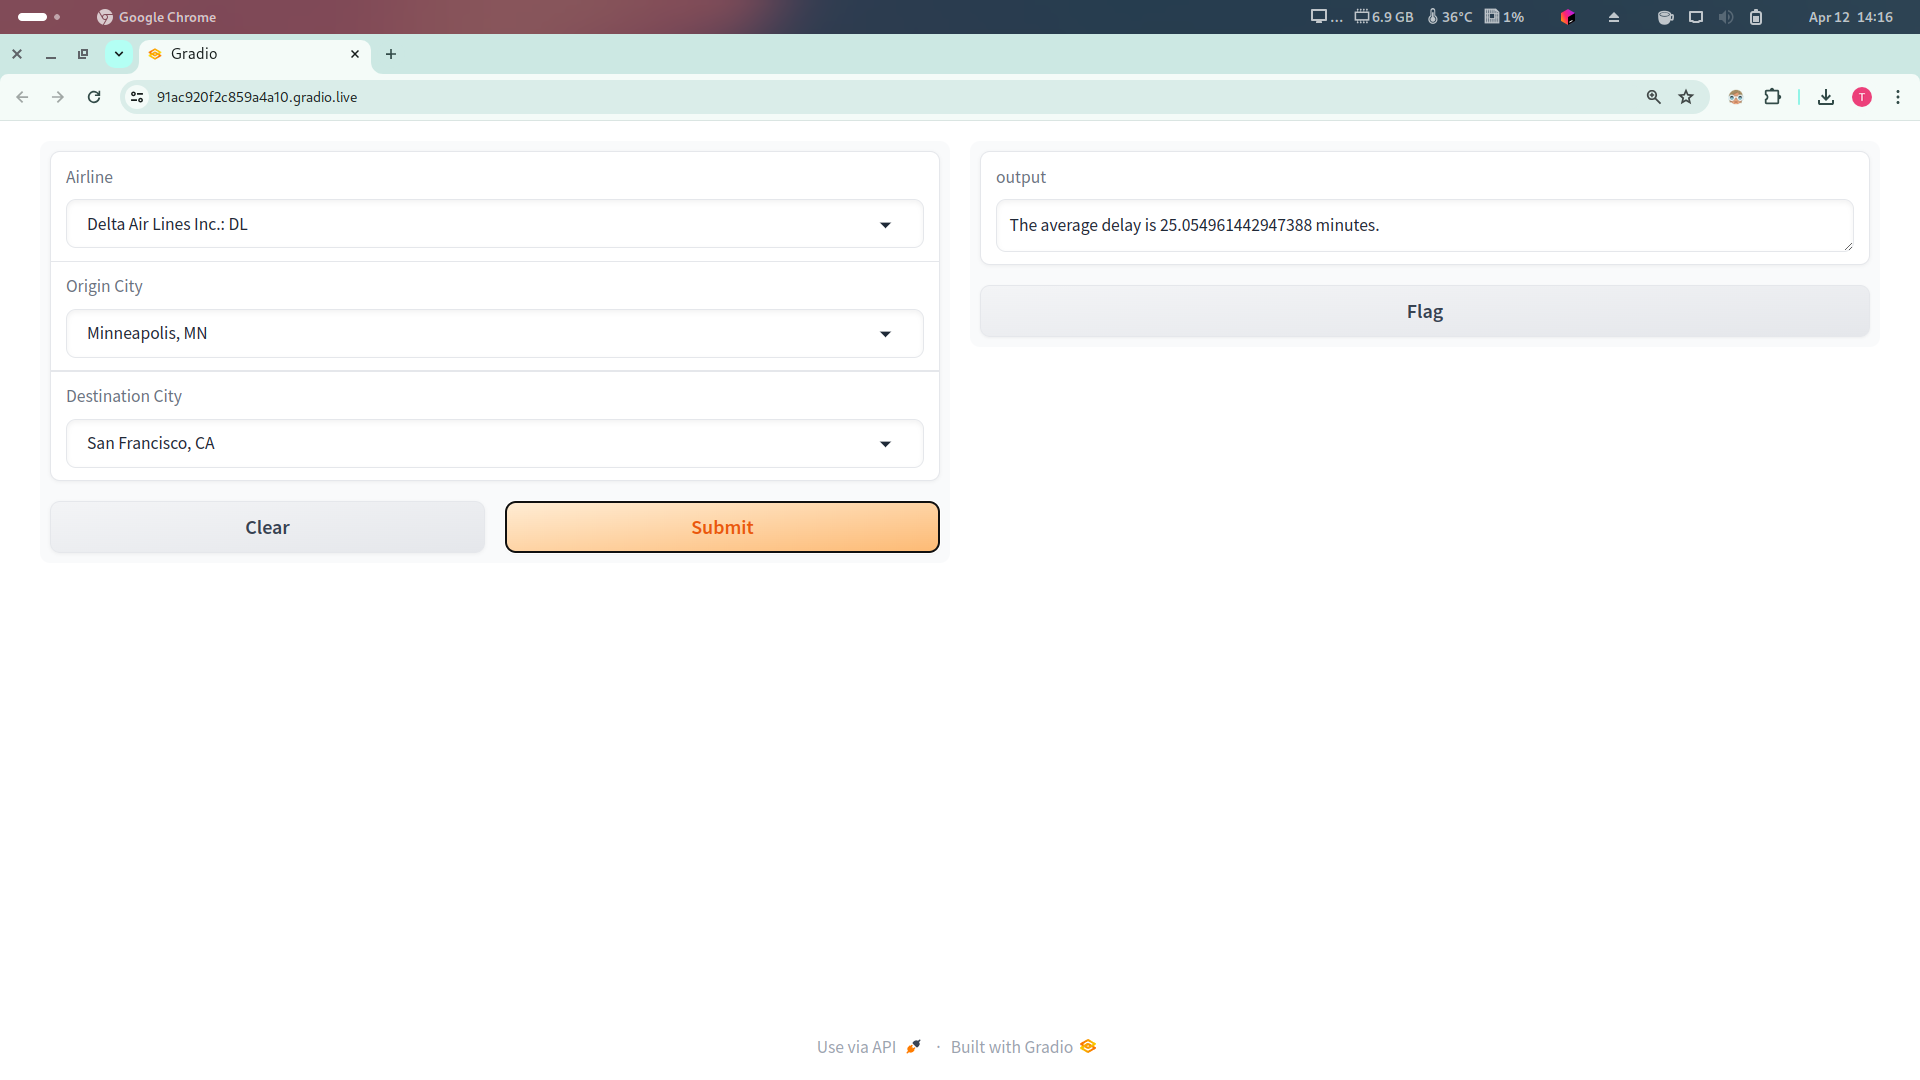

### Preprocess for dropdown

In [ ]:
# import required packages and set display options
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# create a dataframe from our dataset and display the first 5 rows
df = pd.read_csv("/content/drive/MyDrive/dataframes/dataframes/flights_sample_3m.csv")
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking for missing values
nan_counts = df.isna().sum()
print(nan_counts)

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [ ]:
# Remove the rows with cancelled flights, as we are only interested in predicting delays
# Also we will keep checking df.shape to track changes in the dataframe
print(df.shape)
df = df[df['CANCELLED'] == 0]
# print df shape
print(df.shape)

(3000000, 32)
(2920860, 32)


In [ ]:
#Remove cancelled and cancelled code columns
df = df.drop(columns=['CANCELLED', 'CANCELLATION_CODE'])
print(df.shape)

(2920860, 30)


In [ ]:
# make missing arrival delay as 0
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)
# print missing values
print(df['ARR_DELAY'].isna().sum())

0


In [ ]:
# Now if ARR_DELAY is 0, then replace missing values in ARR_TIME with CRS_ARR_TIME
df.loc[df['ARR_DELAY'] == 0, 'ARR_TIME'] = df['CRS_ARR_TIME']
print(df['ARR_TIME'].isna().sum())

0


In [ ]:
# replace missing TAXI_IN values with average TAXI_IN where ARR_DELAY is 0
mean_taxi_in = df['TAXI_IN'].fillna(df['TAXI_IN'].mean())
df.loc[df['ARR_DELAY'] == 0, 'TAXI_IN'] = mean_taxi_in
print(df['TAXI_IN'].isna().sum())

0


In [ ]:
# (Wheels On = Arr Time - Taxi In)  handle missing values in WHEELS_ON using ARR_TIME and TAXI_IN
wheels_on_time = df['ARR_TIME'] - df['TAXI_IN']
df.loc[df['WHEELS_ON'].isna(), 'WHEELS_ON'] = wheels_on_time
print(df["WHEELS_ON"].isna().sum())

0


In [ ]:
#(Air Time = Wheels On Time - Wheels Off Time) handle missing values in AIR_TIME using WHEELS_ON and WHEELS_OFF
air_time = df['WHEELS_ON'] - df['WHEELS_OFF']
df.loc[df['AIR_TIME'].isna(), 'AIR_TIME'] = air_time
print(df["AIR_TIME"].isna().sum())

0


In [ ]:
#(Elapsed Time = Taxi-Out Time + Air Time + Taxi-In Time) handle missing values in ELAPSED_TIME using TAXI_OUT, AIR_TIME and TAXI_IN
elapsed_time = df['TAXI_OUT'] + df['AIR_TIME'] + df['TAXI_IN']
df.loc[df['ELAPSED_TIME'].isna(), 'ELAPSED_TIME'] = elapsed_time
print(df["ELAPSED_TIME"].isna().sum())

0


In [ ]:
# now replace missing values in DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT with 0
df['DELAY_DUE_CARRIER'] = df['DELAY_DUE_CARRIER'].fillna(0)
df['DELAY_DUE_WEATHER'] = df['DELAY_DUE_WEATHER'].fillna(0)
df['DELAY_DUE_NAS'] = df['DELAY_DUE_NAS'].fillna(0)
df['DELAY_DUE_SECURITY'] = df['DELAY_DUE_SECURITY'].fillna(0)
df['DELAY_DUE_LATE_AIRCRAFT'] = df['DELAY_DUE_LATE_AIRCRAFT'].fillna(0)

# All missing values are handled
print(df.isna().sum())


FL_DATE                    0
AIRLINE                    0
AIRLINE_DOT                0
AIRLINE_CODE               0
DOT_CODE                   0
FL_NUMBER                  0
ORIGIN                     0
ORIGIN_CITY                0
DEST                       0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64


In [ ]:
# create a new column 'TOTAL_DELAY', which contains only positive delays from the ARR_DELAY column
# Negative delays are considered as early arrivals and are not considered as delays

df['TOTAL_DELAY'] = df['ARR_DELAY'].apply(lambda x: 0 if x < 0 else x)
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,TOTAL_DELAY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,24.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# normalize all time columns using min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME', 'AIR_TIME', 'ELAPSED_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'TOTAL_DELAY', 'CRS_ELAPSED_TIME',
                'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

df[time_columns] = scaler.fit_transform(df[time_columns])

#now we will normalize distance using min-max normalization
scaler = MinMaxScaler()
df['DISTANCE'] = scaler.fit_transform(df[['DISTANCE']])

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,TOTAL_DELAY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",0.489398,0.479366,0.028141,0.098361,0.503960,0.601529,0.012097,0.625261,0.602751,0.027063,0.0,0.262784,0.535074,0.535284,0.179146,0.0,0.0,0.000000,0.0,0.0,0.00000
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",0.898643,0.880784,0.027487,0.043716,0.884535,0.930049,0.149194,0.964569,0.962484,0.030033,0.0,0.332386,0.548025,0.543060,0.236901,0.0,0.0,0.000000,0.0,0.0,0.00000
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",0.404156,0.416424,0.031414,0.103825,0.424760,0.519919,0.016129,0.521467,0.521467,0.031683,0.0,0.166193,0.521261,0.521027,0.112571,0.0,0.0,0.000000,0.0,0.0,0.00000
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",0.681934,0.669862,0.029123,0.142077,0.681117,0.768495,0.032258,0.761984,0.771988,0.039604,0.0,0.367898,0.558601,0.556021,0.269756,0.0,0.0,0.013785,0.0,0.0,0.00818
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",0.779898,0.765736,0.028796,0.076503,0.771988,0.844276,0.052419,0.850354,0.849937,0.031353,0.0,0.255682,0.536370,0.535284,0.165312,0.0,0.0,0.000000,0.0,0.0,0.00000


In [ ]:
# backup_copy = df.copy() # create a backup copy of the dataframe just in case

# Now we will convert categorical columns to numerical using label encoding and also save the mapping for future use
# Additionally, we need to take low ram usage into account and hence use chunks for label encoding
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
categorical_columns = ['AIRLINE_DOT','ORIGIN_CITY','DEST_CITY']

num_chunks = 10
mapping = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    for i in range(num_chunks):
        chunk = df[column].iloc[i::num_chunks]
        label_encoders[column].fit(chunk)
        df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
        mapping[column]= dict(zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_)))
        print(mapping)

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}}
{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

{'AIRLINE_DOT': {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}, 'ORIGIN_CITY': {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, 

<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders[column].transform(chunk)
<ipython-input-64-958988f2d098>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i::num_chunks] = label_encoders

In [ ]:
#print mappings
for key, value in mapping.items():
    print(f"{key} : {value}")

AIRLINE_DOT : {'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}
ORIGIN_CITY : {'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, NJ':

In [ ]:
# create three different  dictionaries for each column
airline_mapping = mapping['AIRLINE_DOT']
origin_city_mapping = mapping['ORIGIN_CITY']
dest_city_mapping = mapping['DEST_CITY']

# print mappings
print(airline_mapping)
print(origin_city_mapping)
print(dest_city_mapping)

{'Alaska Airlines Inc.: AS': 0, 'Allegiant Air: G4': 1, 'American Airlines Inc.: AA': 2, 'Delta Air Lines Inc.: DL': 3, 'Endeavor Air Inc.: 9E': 4, 'Envoy Air: MQ': 5, 'ExpressJet Airlines LLC d/b/a aha!: EV': 6, 'Frontier Airlines Inc.: F9': 7, 'Hawaiian Airlines Inc.: HA': 8, 'Horizon Air: QX': 9, 'JetBlue Airways: B6': 10, 'Mesa Airlines Inc.: YV': 11, 'PSA Airlines Inc.: OH': 12, 'Republic Airline: YX': 13, 'SkyWest Airlines Inc.: OO': 14, 'Southwest Airlines Co.: WN': 15, 'Spirit Air Lines: NK': 16, 'United Air Lines Inc.: UA': 17}
{'Aberdeen, SD': 0, 'Abilene, TX': 1, 'Adak Island, AK': 2, 'Aguadilla, PR': 3, 'Akron, OH': 4, 'Alamosa, CO': 5, 'Albany, GA': 6, 'Albany, NY': 7, 'Albuquerque, NM': 8, 'Alexandria, LA': 9, 'Allentown/Bethlehem/Easton, PA': 10, 'Alpena, MI': 11, 'Amarillo, TX': 12, 'Anchorage, AK': 13, 'Appleton, WI': 14, 'Arcata/Eureka, CA': 15, 'Asheville, NC': 16, 'Ashland, WV': 17, 'Aspen, CO': 18, 'Atlanta, GA': 19, 'Atlantic City, NJ': 20, 'Augusta, GA': 21, 'Aus

### Models

In [ ]:
# import nessesaray libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [ ]:
# read df from no_multi.csv
df = pd.read_csv('/content/drive/MyDrive/dataframes/dataframes/df_no_multicollinearity.csv')
# drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,TAXI_IN,ELAPSED_TIME,DELAY_DUE_SECURITY,TOTAL_DELAY,AIRLINE_DOT,FL_NUMBER,ORIGIN_CITY,DEST_CITY
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366,0.012097,0.535074,0.0,0.00000,17,1562,117,239
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784,0.149194,0.548025,0.0,0.00000,3,1149,220,318
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424,0.016129,0.521261,0.0,0.00000,17,459,88,220
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862,0.032258,0.558601,0.0,0.00818,3,2295,220,303
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736,0.052419,0.536370,0.0,0.00000,16,407,253,83


In [ ]:
# create a frame for prediction
df_pred = df
df.head()

,ARR_DELAY,DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_NAS,DELAY_DUE_WEATHER,TAXI_OUT,DEP_TIME,TAXI_IN,ELAPSED_TIME,DELAY_DUE_SECURITY,TOTAL_DELAY,AIRLINE_DOT,FL_NUMBER,ORIGIN_CITY,DEST_CITY
0,0.027063,0.0,0.000000,0.0,0.098361,0.479366,0.012097,0.535074,0.0,0.00000,17,1562,117,239
1,0.030033,0.0,0.000000,0.0,0.043716,0.880784,0.149194,0.548025,0.0,0.00000,3,1149,220,318
2,0.031683,0.0,0.000000,0.0,0.103825,0.416424,0.016129,0.521261,0.0,0.00000,17,459,88,220
3,0.039604,0.0,0.013785,0.0,0.142077,0.669862,0.032258,0.558601,0.0,0.00818,3,2295,220,303
4,0.031353,0.0,0.000000,0.0,0.076503,0.765736,0.052419,0.536370,0.0,0.00000,16,407,253,83


In [ ]:
# aplly linear regression to the data TOTAL_DELAY and check accurecy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# split the data
X = df_pred.drop('TOTAL_DELAY', axis=1)
y = df_pred['TOTAL_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model_pred = LinearRegression()

# fit the model
model_pred.fit(X_train, y_train)

# predict the model
y_pred = model_pred.predict(X_test)

# check the accurecy
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# accurecy
acc = model_pred.score(X_test, y_test)
print(f'Accuracy: {acc}')


Mean Squared Error: 7.988537020906956e-06
Accuracy: 0.9699325761122171


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read CSV without multicollinearity
df_no_multicollinearity = pd.read_csv("/content/drive/MyDrive/dataframes/dataframes/df_no_multicollinearity.csv")
df_no_multicollinearity = df_no_multicollinearity.drop(df_no_multicollinearity.columns[0], axis=1)

# df_no_multicollinearity = pd.read_csv("/content/drive/MyDrive/dataframes/dataframes/df_no_multicollinearity.csv", usecols=range(1, df_no_multicollinearity.shape[1]))

df_no_multicollinearity['CLASSIFICATION'] = df_no_multicollinearity['TOTAL_DELAY'].apply(lambda x: 0 if x == 0 else 1)
df_no_multicollinearity = df_no_multicollinearity.drop(columns=['TOTAL_DELAY'])

# Pick 100000 distinct rows from dataset to reduce dataset size and avoid overfitting
df_100000 = df_no_multicollinearity.sample(n=100000, random_state=42)

# Apply deep learning model to predict the delay and calculate accuracy, precision, recall, and F1 score
def apply_deep_learning(df):
    X = df.drop(columns=['CLASSIFICATION'])
    y = df['CLASSIFICATION']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1, batch_size=10, verbose=1, validation_data=(X_test, y_test))
    y_pred = model.predict(X_test)
    y_pred_rounded = np.round(y_pred).flatten()
    return y_test, y_pred_rounded,model,sc

y_test, y_pred_rounded,model, sc = apply_deep_learning(df_100000)

model.summary()


625/625 [==============================] - 1s 1ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                448       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### UI

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
# create dropdowns for each categorical column from mappings
airline_dropdown = gr.Dropdown(choices=list(airline_mapping.keys()), label="Airline")
origin_city_dropdown = gr.Dropdown(choices=list(origin_city_mapping.keys()), label="Origin City")
dest_city_dropdown = gr.Dropdown(choices=list(dest_city_mapping.keys()), label="Destination City")

# print the matching entry from df_no_multicollinearity for the selected airline, origin city, and destination city
def predict_delay(airline, origin_city, dest_city, *args):

    # fillter the data according to the selected values
    df_filtered = df_no_multicollinearity[(df_no_multicollinearity['AIRLINE_DOT'] == airline_mapping[airline]) & (df_no_multicollinearity['ORIGIN_CITY'] == origin_city_mapping[origin_city]) & (df_no_multicollinearity['DEST_CITY'] == dest_city_mapping[dest_city])]
    # print the filtered data
    print(df_filtered)

    if len(df_filtered) == 0:
      return "Flight Not Found"

    # apply prediction on this filtered data and take average and print delay in minutes
    X = df_filtered.drop(columns=['CLASSIFICATION'])
    X = sc.transform(X)
    y_pred = model.predict(X)
    avg_delay = np.mean(y_pred)

    # use sacler to transform the data
    # avg_delay = scaler.inverse_transform(avg_delay)

    return f"The average delay is {avg_delay*100} minutes."




# create a gradio interface
gr.Interface(fn=predict_delay, inputs=[airline_dropdown, origin_city_dropdown, dest_city_dropdown], outputs="text").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://91ac920f2c859a4a10.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
